In [1462]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
from datetime import datetime
import koreanize_matplotlib
%precision 3
pd.set_option('display.precision', 3)

In [1463]:
weatherDF = pd.read_excel('data/weather.xlsx', skiprows=7, header=0)
weatherDF.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2003-01-01,143,-1.2,-3.6,3.2
1,2003-01-02,143,-0.9,-7.7,4.7
2,2003-01-03,143,0.2,-3.1,4.7
3,2003-01-04,143,-5.1,-8.2,-1.2
4,2003-01-05,143,-8.3,-10.4,-4.3


In [1464]:
spring_start = []
spring_season = []
summer_start = []
summer_season = []
fall_start = []
fall_season = []
winter_start = []
winter_season = [0]

In [1465]:
weatherDF

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2003-01-01,143,-1.2,-3.6,3.2
1,2003-01-02,143,-0.9,-7.7,4.7
2,2003-01-03,143,0.2,-3.1,4.7
3,2003-01-04,143,-5.1,-8.2,-1.2
4,2003-01-05,143,-8.3,-10.4,-4.3
...,...,...,...,...,...
7665,2023-12-27,143,3.8,-0.9,11.3
7666,2023-12-28,143,3.5,-3.0,10.6
7667,2023-12-29,143,3.1,-2.9,9.5
7668,2023-12-30,143,2.9,-2.9,7.7


In [1466]:
for y in range(2003,2024):
    spring_start.append(weatherDF.loc[weatherDF[(weatherDF['날짜'].dt.year == y) & ((weatherDF['날짜'].dt.month == 3) | (weatherDF['날짜'].dt.month == 2)) & (weatherDF['평균기온(℃)'] < 5)].tail(1).index + 1]['날짜'])

spring_start = pd.concat(spring_start)

In [1467]:
for y in range(2003,2024):
    summer_start.append(weatherDF.loc[weatherDF[(weatherDF['날짜'].dt.year == y) & ((weatherDF['날짜'].dt.month == 6) | (weatherDF['날짜'].dt.month == 5)) & (weatherDF['평균기온(℃)'] < 20)].tail(1).index + 1]['날짜'])

summer_start = pd.concat(summer_start)

In [1468]:
for y in range(2003,2024):
    fall_start.append(weatherDF.loc[weatherDF[(weatherDF['날짜'].dt.year == y) & ((weatherDF['날짜'].dt.month == 9) | (weatherDF['날짜'].dt.month == 10)) & (weatherDF['평균기온(℃)'] > 20)].tail(1).index + 1]['날짜'])
fall_start = pd.concat(fall_start)

In [1469]:
for y in range(2003,2024):
    winter_start.append(weatherDF.loc[weatherDF[(weatherDF['날짜'].dt.year == y) & ((weatherDF['날짜'].dt.month == 11) | (weatherDF['날짜'].dt.month == 12)) & (weatherDF['평균기온(℃)'] > 5)].tail(1).index + 1]['날짜'])
winter_start = pd.concat(winter_start)

In [1470]:
len(spring_start), len(summer_start),len(fall_start),len(winter_start)

(21, 21, 21, 21)

In [1471]:
spring_start.reset_index(drop=True, inplace=True)
summer_start.reset_index(drop=True, inplace=True)
fall_start.reset_index(drop=True, inplace=True)
winter_start.reset_index(drop=True, inplace=True)

In [1472]:
df = pd.concat([spring_start,summer_start,fall_start,winter_start], axis=1)
df.columns = ['spring_start','summer_start','fall_start','winter_start']
df

,spring_start,summer_start,fall_start,winter_start
0,2003-03-12,2003-06-28,2003-09-29,2003-12-25
1,2004-03-09,2004-06-20,2004-09-28,2004-12-20
2,2005-03-25,2005-06-11,2005-10-04,2005-12-03
3,2006-03-15,2006-06-26,2006-10-22,2006-12-28
4,2007-03-12,2007-06-10,2007-10-06,2007-12-29
5,2008-03-06,2008-06-30,2008-10-10,2008-12-19
6,2009-03-15,2009-06-08,2009-10-03,2009-12-14
7,2010-03-27,2010-06-02,2010-10-11,2010-12-23
8,2011-03-26,2011-06-26,2011-10-14,2011-12-15
9,2012-03-14,2012-05-31,2012-09-29,2012-12-17


In [1473]:
for i in range(1,21):
    winter_season.append((spring_start[i]-winter_start[i-1]).days)
for i in range(21):
    spring_season.append((summer_start[i]- spring_start[i]).days)
    summer_season.append((fall_start[i]-summer_start[i]).days)
    fall_season.append((winter_start[i]-fall_start[i]).days)
spring_season[0]

108

In [1474]:
df['spring_season'] = spring_season
df['summer_season'] = summer_season
df['fall_season'] = fall_season
df['winter_season'] = winter_season
df.set_index(np.arange(2003,2024), inplace=True)
df

,spring_start,summer_start,fall_start,winter_start,spring_season,summer_season,fall_season,winter_season
2003,2003-03-12,2003-06-28,2003-09-29,2003-12-25,108,93,87,0
2004,2004-03-09,2004-06-20,2004-09-28,2004-12-20,103,100,83,75
2005,2005-03-25,2005-06-11,2005-10-04,2005-12-03,78,115,60,95
2006,2006-03-15,2006-06-26,2006-10-22,2006-12-28,103,118,67,102
2007,2007-03-12,2007-06-10,2007-10-06,2007-12-29,90,118,84,74
2008,2008-03-06,2008-06-30,2008-10-10,2008-12-19,116,102,70,68
2009,2009-03-15,2009-06-08,2009-10-03,2009-12-14,85,117,72,86
2010,2010-03-27,2010-06-02,2010-10-11,2010-12-23,67,131,73,103
2011,2011-03-26,2011-06-26,2011-10-14,2011-12-15,92,110,62,93
2012,2012-03-14,2012-05-31,2012-09-29,2012-12-17,78,121,79,90


In [1475]:
for i in df.index:
    # 원본 날짜
    original_date = str(df.loc[i, 'spring_start'])  # datetime 객체를 문자열로 변환

    # 원하는 형식으로 변환
    formatted_date = datetime.strptime(original_date, '%Y-%m-%d %H:%M:%S').strftime('%m-%d')

    # 다시 datetime 객체로 변환
    df.loc[i, 'spring_start'] = datetime.strptime(formatted_date, '%m-%d')

    # 이하 동일한 방식으로 다른 계절에 대해서도 처리

    original_date = str(df.loc[i, 'summer_start'])
    formatted_date = datetime.strptime(original_date, '%Y-%m-%d %H:%M:%S').strftime('%m-%d')
    df.loc[i, 'summer_start'] = datetime.strptime(formatted_date, '%m-%d')

    original_date = str(df.loc[i, 'fall_start'])
    formatted_date = datetime.strptime(original_date, '%Y-%m-%d %H:%M:%S').strftime('%m-%d')
    df.loc[i, 'fall_start'] = datetime.strptime(formatted_date, '%m-%d')

    original_date = str(df.loc[i, 'winter_start'])
    formatted_date = datetime.strptime(original_date, '%Y-%m-%d %H:%M:%S').strftime('%m-%d')
    df.loc[i, 'winter_start'] = datetime.strptime(formatted_date, '%m-%d')
df

,spring_start,summer_start,fall_start,winter_start,spring_season,summer_season,fall_season,winter_season
2003,1900-03-12,1900-06-28,1900-09-29,1900-12-25,108,93,87,0
2004,1900-03-09,1900-06-20,1900-09-28,1900-12-20,103,100,83,75
2005,1900-03-25,1900-06-11,1900-10-04,1900-12-03,78,115,60,95
2006,1900-03-15,1900-06-26,1900-10-22,1900-12-28,103,118,67,102
2007,1900-03-12,1900-06-10,1900-10-06,1900-12-29,90,118,84,74
2008,1900-03-06,1900-06-30,1900-10-10,1900-12-19,116,102,70,68
2009,1900-03-15,1900-06-08,1900-10-03,1900-12-14,85,117,72,86
2010,1900-03-27,1900-06-02,1900-10-11,1900-12-23,67,131,73,103
2011,1900-03-26,1900-06-26,1900-10-14,1900-12-15,92,110,62,93
2012,1900-03-14,1900-05-31,1900-09-29,1900-12-17,78,121,79,90


In [1476]:
from pandas import Timestamp

spring_date = []
n = 0
for i in range(2003,2024):  
    spring_date.append((spring_start[n] - Timestamp(f'{i}-03-01')).days)
    n += 1
spring_date

summer_date = []
n = 0
for i in range(2003,2024):  
    summer_date.append((summer_start[n] - Timestamp(f'{i}-06-01')).days)
    n += 1
summer_date

fall_date = []
n = 0
for i in range(2003,2024):  
    fall_date.append((fall_start[n] - Timestamp(f'{i}-10-01')).days)
    n += 1
fall_date

winter_date = []
n = 0
for i in range(2003,2024):  
    winter_date.append((winter_start[n] - Timestamp(f'{i}-12-01')).days)
    n += 1

df['spring_date'] = spring_date
df['summer_date'] = summer_date
df['fall_date'] = fall_date
df['winter_date'] = winter_date
df

,spring_start,summer_start,fall_start,winter_start,spring_season,summer_season,fall_season,winter_season,spring_date,summer_date,fall_date,winter_date
2003,1900-03-12,1900-06-28,1900-09-29,1900-12-25,108,93,87,0,11,27,-2,24
2004,1900-03-09,1900-06-20,1900-09-28,1900-12-20,103,100,83,75,8,19,-3,19
2005,1900-03-25,1900-06-11,1900-10-04,1900-12-03,78,115,60,95,24,10,3,2
2006,1900-03-15,1900-06-26,1900-10-22,1900-12-28,103,118,67,102,14,25,21,27
2007,1900-03-12,1900-06-10,1900-10-06,1900-12-29,90,118,84,74,11,9,5,28
2008,1900-03-06,1900-06-30,1900-10-10,1900-12-19,116,102,70,68,5,29,9,18
2009,1900-03-15,1900-06-08,1900-10-03,1900-12-14,85,117,72,86,14,7,2,13
2010,1900-03-27,1900-06-02,1900-10-11,1900-12-23,67,131,73,103,26,1,10,22
2011,1900-03-26,1900-06-26,1900-10-14,1900-12-15,92,110,62,93,25,25,13,14
2012,1900-03-14,1900-05-31,1900-09-29,1900-12-17,78,121,79,90,13,-1,-2,16


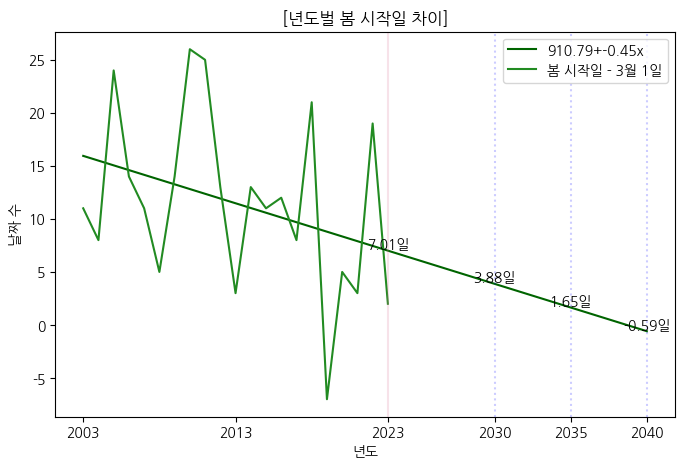

In [1515]:
sdt_fx = np.poly1d(np.polyfit(df.index,df['spring_date'],1))
xs = np.linspace(df.index.min(), 2040)#2040
ys = sdt_fx(xs)
fig = plt.figure(figsize=(8, 5))
plt.plot(xs, ys, color='darkgreen',label=f"{np.polyfit(df.index,df['spring_date'],1)[1]:.2f}+{np.polyfit(df.index,df['spring_date'],1)[0]:.2f}x")
plt.plot(df.index,df['spring_date'], color = 'forestgreen', label = '봄 시작일 - 3월 1일')
plt.xlabel('년도')
plt.ylabel('날짜 수')
plt.title('[년도벌 봄 시작일 차이]')
plt.axvline(2023, color = 'palevioletred', alpha = 0.2)
plt.axvline(2030, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2035, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2040, color = 'blue', linestyle = ':',alpha = 0.2)
plt.legend(loc = 'upper right')
plt.xticks([2003,2013,2023,2030,2035,2040])
x2 = [2023,2030,2035,2040]
for i in range(len(x2)):
    plt.text(x2[i], sdt_fx(x2)[i],f'{sdt_fx(x2[i]):.2f}일', ha='center', va='bottom')

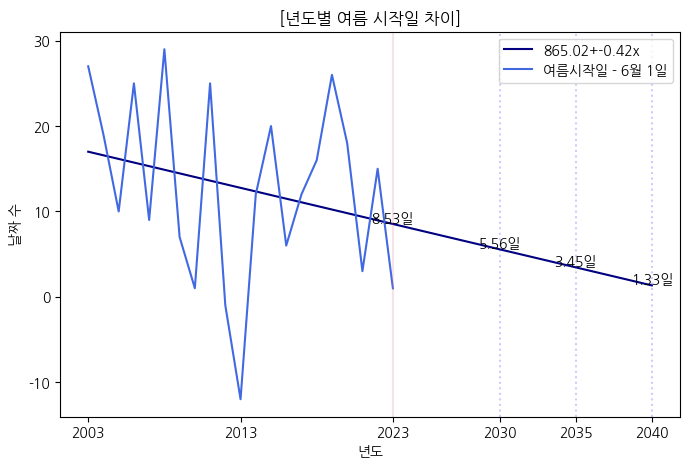

In [1514]:
ssdt_fx = np.poly1d(np.polyfit(df.index,df['summer_date'],1))
xs = np.linspace(df.index.min(), 2040)#2040
ys = ssdt_fx(xs)
fig = plt.figure(figsize=(8, 5))
plt.plot(xs, ys, color='navy',label=f"{np.polyfit(df.index,df['summer_date'],1)[1]:.2f}+{np.polyfit(df.index,df['summer_date'],1)[0]:.2f}x")
plt.plot(df.index,df['summer_date'],color = 'royalblue', label = '여름시작일 - 6월 1일')
plt.xlabel('년도')
plt.ylabel('날짜 수')
plt.title('[년도별 여름 시작일 차이]')
plt.axvline(2023, color = 'palevioletred', alpha = 0.2)
plt.axvline(2030, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2035, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2040, color = 'blue', linestyle = ':',alpha = 0.2)
plt.xticks([2003,2013,2023,2030,2035,2040])
plt.legend(loc = 'upper right')
x2 = [2023,2030,2035,2040]
for i in range(len(x2)):
    plt.text(x2[i], ssdt_fx(x2)[i],f'{ssdt_fx(x2[i]):.2f}일', ha='center', va='bottom')


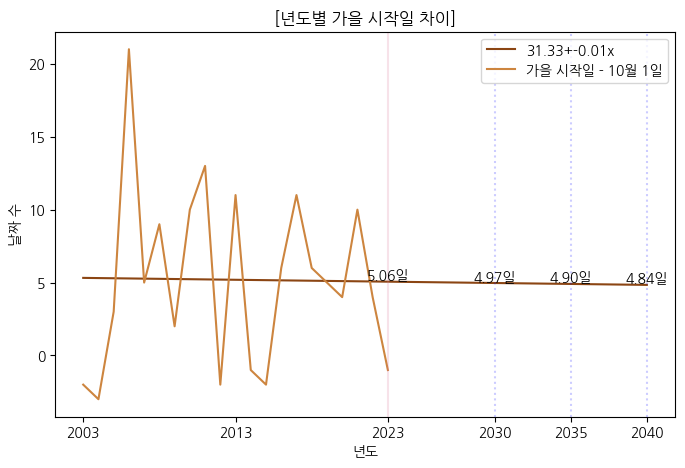

In [1516]:
fdt_fx = np.poly1d(np.polyfit(df.index,df['fall_date'],1))
xs = np.linspace(df.index.min(), 2040)#2040
ys = fdt_fx(xs)
fig = plt.figure(figsize=(8, 5))
plt.plot(xs, ys, color='saddlebrown', label=f"{np.polyfit(df.index,df['fall_date'],1)[1]:.2f}+{np.polyfit(df.index,df['fall_date'],1)[0]:.2f}x")
plt.plot(df.index,df['fall_date'], color = 'peru', label = '가을 시작일 - 10월 1일')
plt.xlabel('년도')
plt.ylabel('날짜 수')
plt.title('[년도별 가을 시작일 차이]')
plt.axvline(2023, color = 'palevioletred', alpha = 0.2)
plt.axvline(2030, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2035, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2040, color = 'blue', linestyle = ':',alpha = 0.2)
plt.xticks([2003,2013,2023,2030,2035,2040])
plt.legend(loc = 'upper right')
x2 = [2023,2030,2035,2040]
for i in range(len(x2)):
    plt.text(x2[i], fdt_fx(x2)[i],f'{fdt_fx(x2[i]):.2f}일', ha='center', va='bottom')

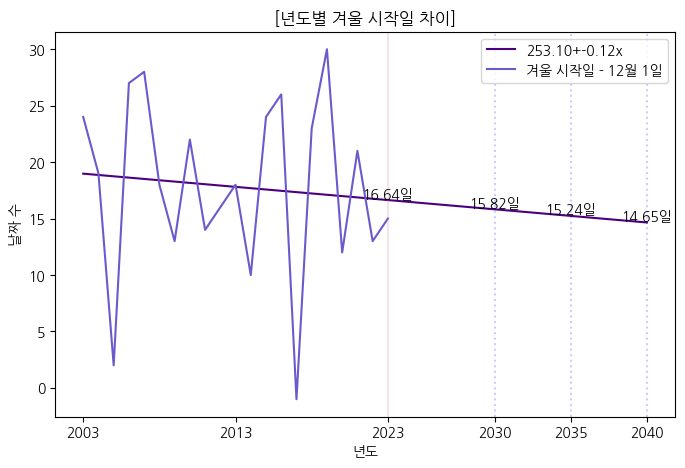

In [1517]:
wdt_fx = np.poly1d(np.polyfit(df.index,df['winter_date'],1))
xs = np.linspace(df.index.min(), 2040)#2040
ys = wdt_fx(xs)
fig = plt.figure(figsize=(8, 5))
plt.plot(xs, ys, color='indigo',label=f"{np.polyfit(df.index,df['winter_date'],1)[1]:.2f}+{np.polyfit(df.index,df['winter_date'],1)[0]:.2f}x")
plt.plot(df.index,df['winter_date'], color = 'slateblue',label = '겨울 시작일 - 12월 1일')
plt.xlabel('년도')
plt.ylabel('날짜 수')
plt.title('[년도별 겨울 시작일 차이]')
plt.axvline(2023, color = 'palevioletred', alpha = 0.2)
plt.axvline(2030, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2035, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2040, color = 'blue', linestyle = ':',alpha = 0.2)
plt.xticks([2003,2013,2023,2030,2035,2040])
plt.legend(loc = 'upper right')
x2 = [2023,2030,2035,2040]
for i in range(len(x2)):
    plt.text(x2[i], wdt_fx(x2)[i],f'{wdt_fx(x2[i]):.2f}일', ha='center', va='bottom')

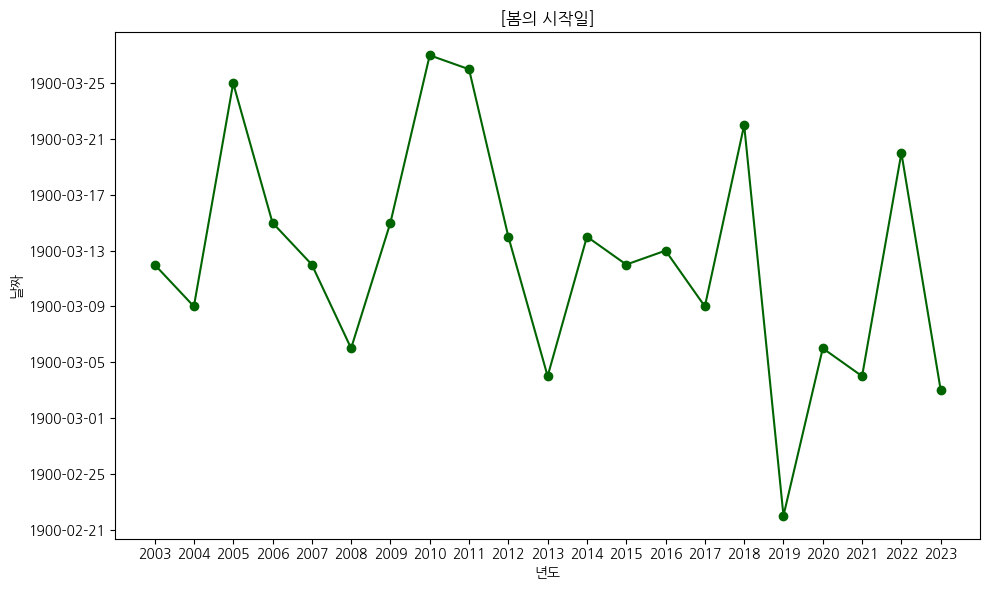

In [1481]:
plt.figure(figsize = (10,6))
plt.plot(df.index,df['spring_start'],color='darkgreen')
plt.scatter(df.index,df['spring_start'],color='darkgreen')
plt.title('[봄의 시작일]')
plt.ylabel('날짜')
plt.xlabel('년도')
plt.xticks(df.index)
plt.yticks()
plt.tight_layout()

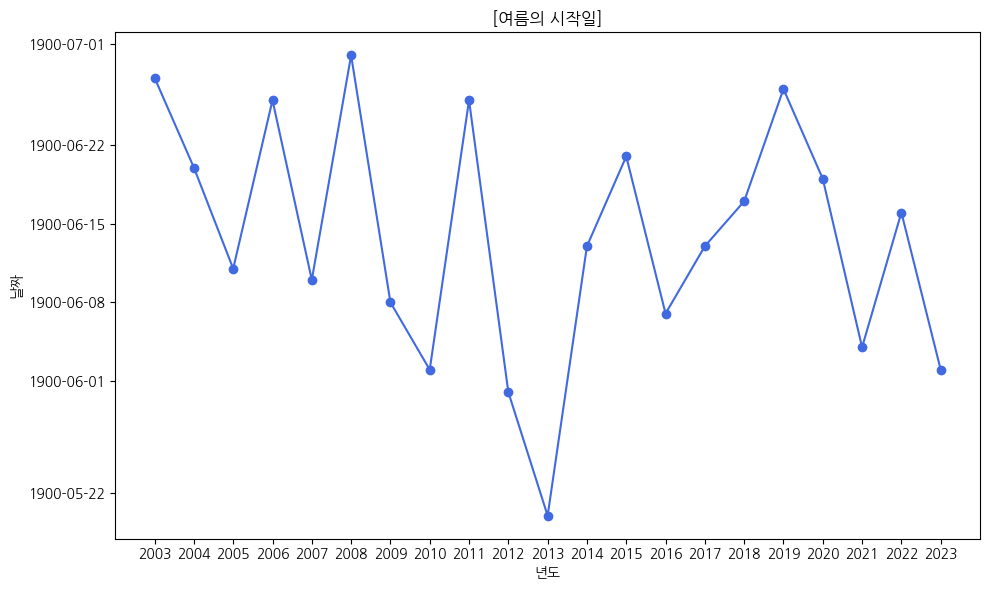

In [1482]:
plt.figure(figsize = (10,6))
plt.plot(df.index,df['summer_start'],color = 'royalblue')
plt.scatter(df.index,df['summer_start'],color = 'royalblue')
plt.title('[여름의 시작일]')
plt.ylabel('날짜')
plt.xlabel('년도')
plt.xticks(df.index)
plt.yticks()
plt.tight_layout()

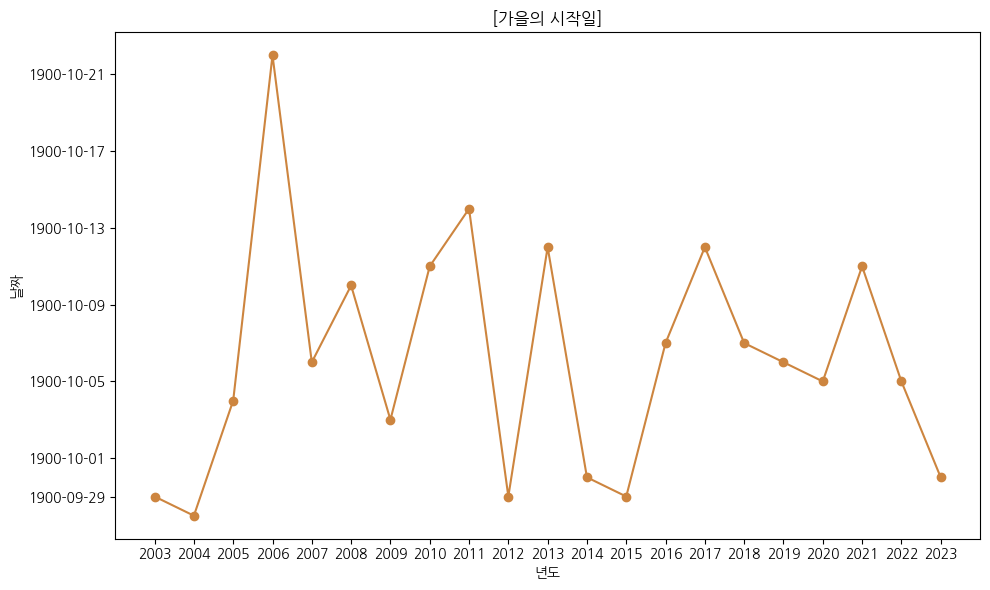

In [1483]:
plt.figure(figsize = (10,6))
plt.plot(df.index,df['fall_start'],color = 'peru')
plt.scatter(df.index,df['fall_start'],color = 'peru')
plt.title('[가을의 시작일]')
plt.ylabel('날짜')
plt.xlabel('년도')
plt.xticks(df.index)
plt.yticks()
plt.tight_layout()

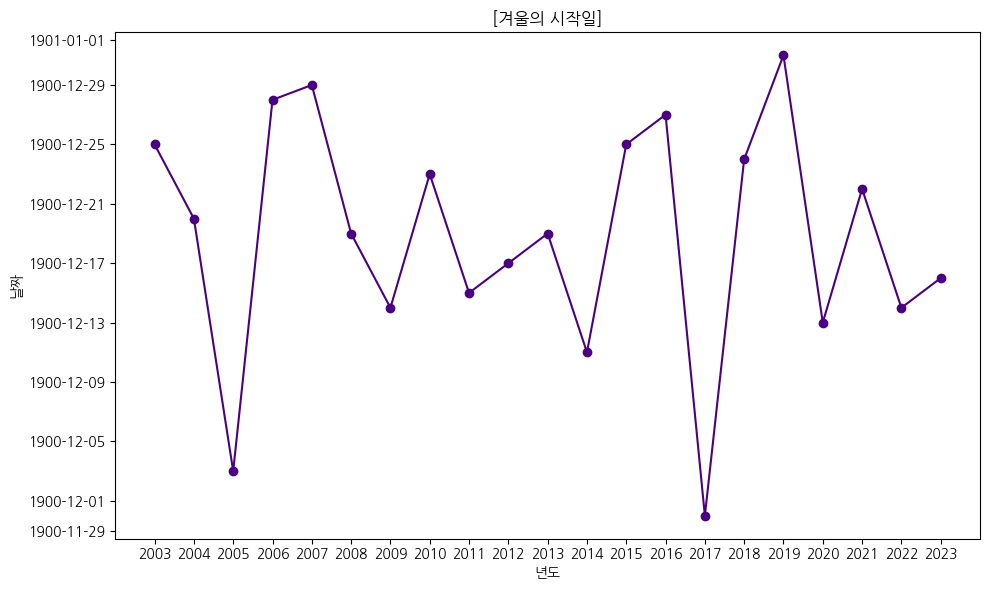

In [1484]:
plt.figure(figsize = (10,6))
plt.scatter(df.index,df['winter_start'],color='indigo')
plt.plot(df.index,df['winter_start'],color='indigo')
plt.title('[겨울의 시작일]')
plt.ylabel('날짜')
plt.xlabel('년도')
plt.xticks(df.index)
plt.yticks()
plt.tight_layout()

Text(0.5, 1.0, '[봄의 길이]')

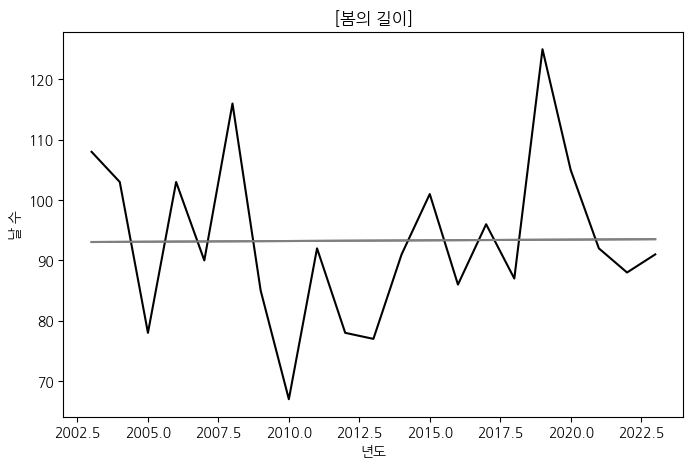

In [1485]:

s_fx = np.poly1d(np.polyfit(df.index,df['spring_season'],1))
xs = np.linspace(df.index.min(), df.index.max())#2040
ys = s_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='gray')
plt.plot(df.index,df['spring_season'], color = 'k')
plt.plot(df.index,s_fx(df.index),color = 'gray')
plt.xlabel('년도')
plt.ylabel('날 수')
plt.title('[봄의 길이]')

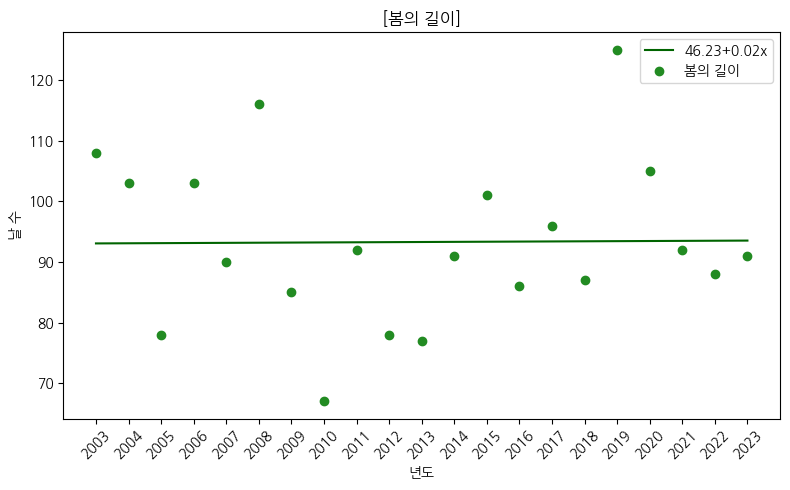

In [1486]:

s_fx = np.poly1d(np.polyfit(df.index,df['spring_season'],1))
xs = np.linspace(df.index.min(), df.index.max())#2040
# xs에 대응하는 y좌표를 구한다
ys = s_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='darkgreen',label=f"{np.polyfit(df.index,df['spring_season'],1)[1]:.2f}+{np.polyfit(df.index,df['spring_season'],1)[0]:.2f}x")
plt.scatter(df.index, df['spring_season'], label = '봄의 길이', color = 'forestgreen')
plt.title('[봄의 길이]')
plt.ylabel('날 수')
plt.xlabel('년도')
plt.xticks(df.index, rotation= 45)
plt.legend(loc='upper right')
plt.tight_layout()

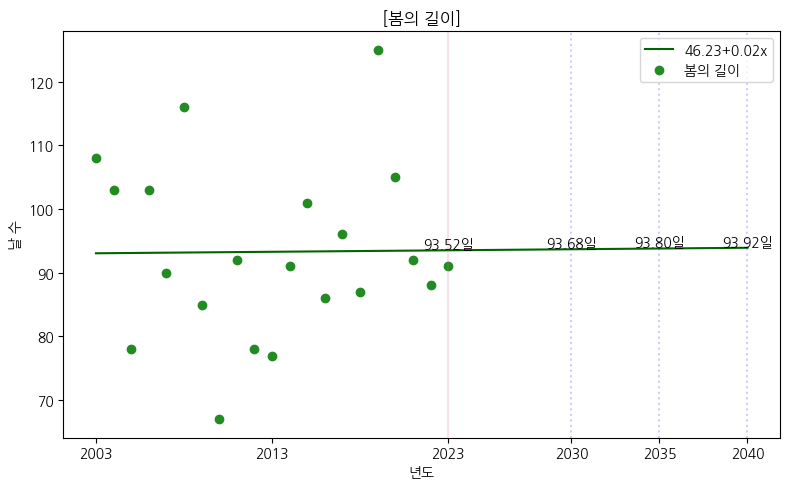

In [1518]:

s_fx = np.poly1d(np.polyfit(df.index,df['spring_season'],1))
xs = np.linspace(df.index.min(), 2040)
# xs에 대응하는 y좌표를 구한다
ys = s_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='darkgreen',label=f"{np.polyfit(df.index,df['spring_season'],1)[1]:.2f}+{np.polyfit(df.index,df['spring_season'],1)[0]:.2f}x")
plt.scatter(df.index, df['spring_season'], label = '봄의 길이', color = 'forestgreen')
plt.axvline(2023, color = 'palevioletred', alpha = 0.2)
plt.axvline(2030, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2035, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2040, color = 'blue', linestyle = ':',alpha = 0.2)
x2 = [2023,2030,2035,2040]
for i in range(len(x2)):
    plt.text(x2[i], s_fx(x2)[i],f'{s_fx(x2[i]):.2f}일', ha='center', va='bottom')
plt.title('[봄의 길이]')
plt.ylabel('날 수')
plt.xlabel('년도')
xl = np.arange(2003,2041)
plt.xticks([2003,2013,2023,2030,2035,2040])
plt.legend(loc='upper right')
plt.tight_layout()

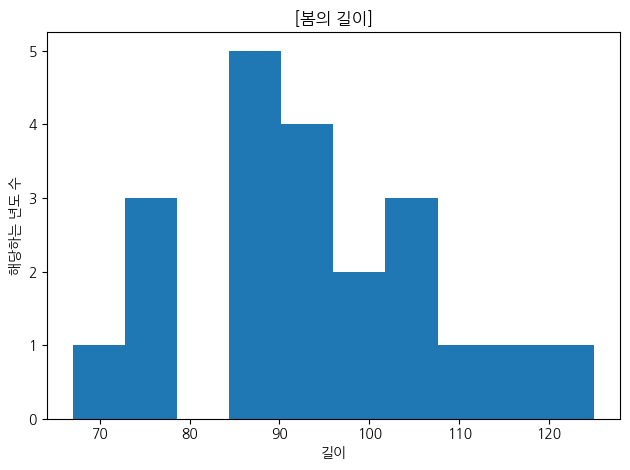

In [1488]:
plt.hist(df['spring_season'] )
plt.title('[봄의 길이]')
plt.ylabel('해당하는 년도 수')
plt.xlabel('길이')
plt.tight_layout()

Text(0.5, 0, '년도')

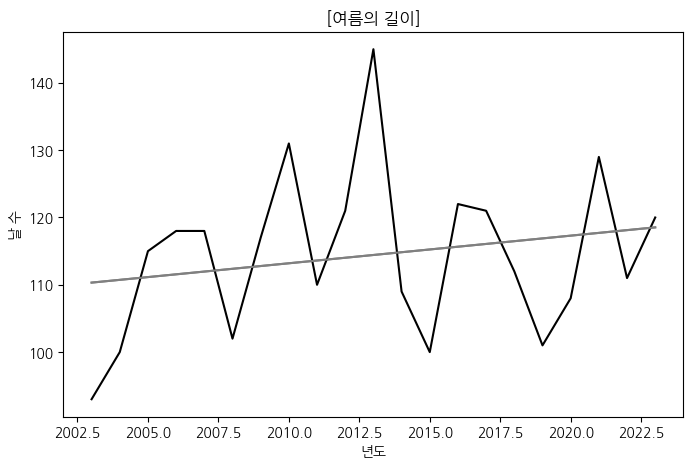

In [1489]:
su_fx = np.poly1d(np.polyfit(df.index,df['summer_season'],1))
xs = np.linspace(df.index.min(), df.index.max())
# xs에 대응하는 y좌표를 구한다
ys = su_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='gray')
plt.plot(df.index,df['summer_season'], color = 'k')
plt.plot(df.index,su_fx(df.index),color = 'gray')
plt.title('[여름의 길이]')
plt.ylabel('날 수')
plt.xlabel('년도')

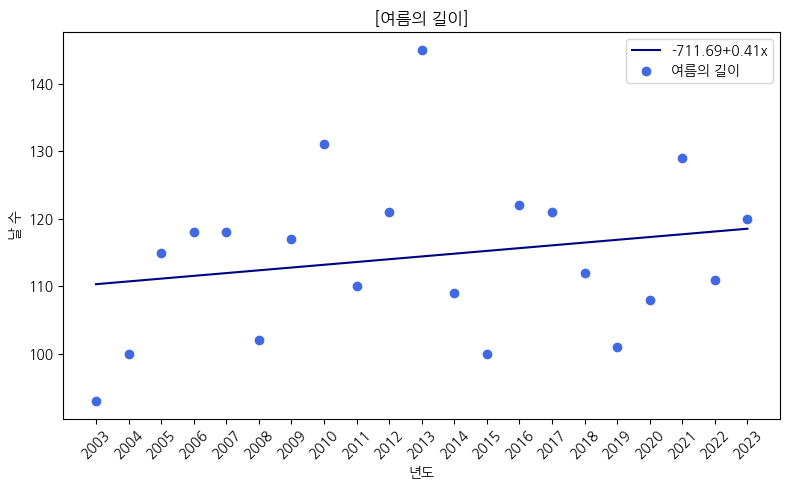

In [1490]:
su_fx = np.poly1d(np.polyfit(df.index,df['summer_season'],1))
xs = np.linspace(df.index.min(), df.index.max())
# xs에 대응하는 y좌표를 구한다
ys = su_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

ax.plot(xs, ys, color='navy',label=f"{np.polyfit(df.index,df['summer_season'],1)[1]:.2f}+{np.polyfit(df.index,df['summer_season'],1)[0]:.2f}x")
plt.scatter(df.index, df['summer_season'], label = '여름의 길이', color = 'royalblue')
plt.title('[여름의 길이]')
plt.ylabel('날 수')
plt.xlabel('년도')
plt.legend(loc='upper right')
plt.xticks(df.index, rotation= 45)
plt.tight_layout()

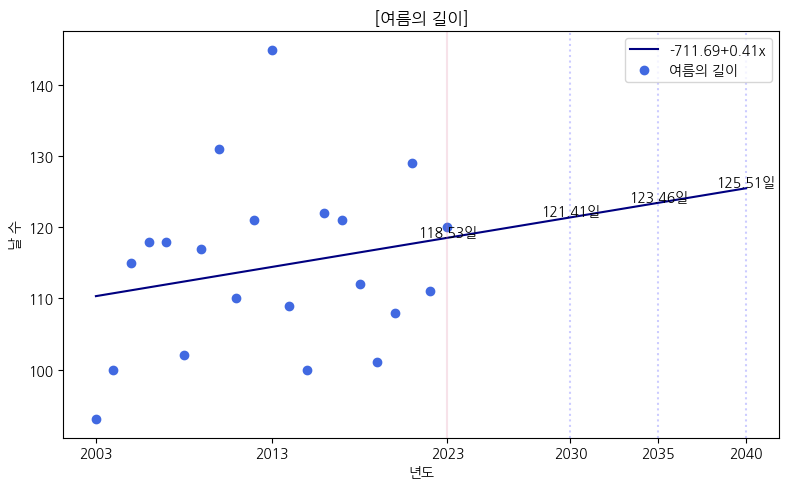

In [1519]:
su_fx = np.poly1d(np.polyfit(df.index,df['summer_season'],1))
xs = np.linspace(df.index.min(), 2040)
# xs에 대응하는 y좌표를 구한다
ys = su_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='navy',label=f"{np.polyfit(df.index,df['summer_season'],1)[1]:.2f}+{np.polyfit(df.index,df['summer_season'],1)[0]:.2f}x")
x2 = [2023,2030,2035,2040]
for i in range(len(x2)):
    plt.text(x2[i], su_fx(x2)[i],f'{su_fx(x2[i]):.2f}일', ha='center', va='bottom')
plt.scatter(df.index, df['summer_season'], label = '여름의 길이', color = 'royalblue')
plt.axvline(2023, color = 'palevioletred', alpha = 0.2)
plt.axvline(2030, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2035, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2040, color = 'blue', linestyle = ':',alpha = 0.2)
plt.title('[여름의 길이]')
plt.ylabel('날 수')
plt.xlabel('년도')
plt.legend(loc='upper right')
xl = np.arange(2003,2041)
plt.xticks([2003,2013,2023,2030,2035,2040])
plt.tight_layout()


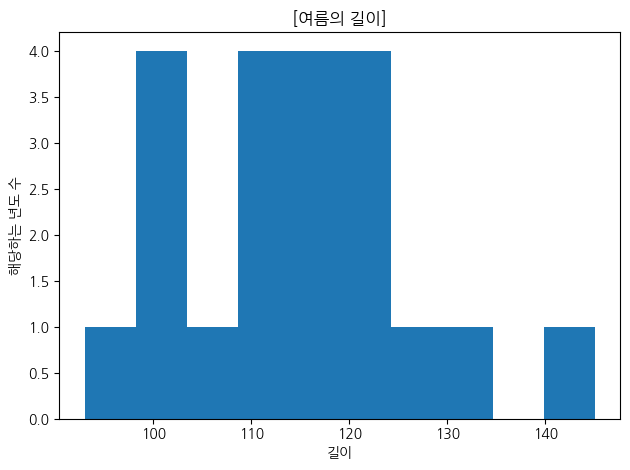

In [1492]:
plt.hist(df['summer_season'] )
plt.title('[여름의 길이]')
plt.ylabel('해당하는 년도 수')
plt.xlabel('길이')
plt.tight_layout()

Text(0.5, 0, '년도')

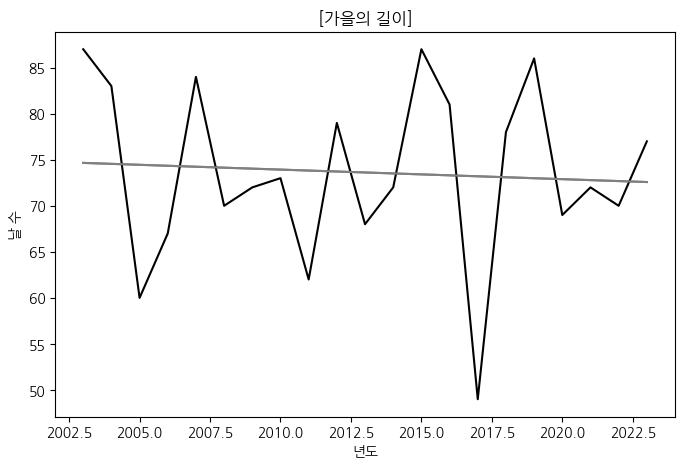

In [1493]:
f_fx = np.poly1d(np.polyfit(df.index,df['fall_season'],1))
xs = np.linspace(df.index.min(), df.index.max())
# xs에 대응하는 y좌표를 구한다
ys = f_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='gray')
plt.plot(df.index,df['fall_season'], color = 'k')
plt.plot(df.index,f_fx(df.index),color = 'gray')
plt.title('[가을의 길이]')
plt.ylabel('날 수')
plt.xlabel('년도')

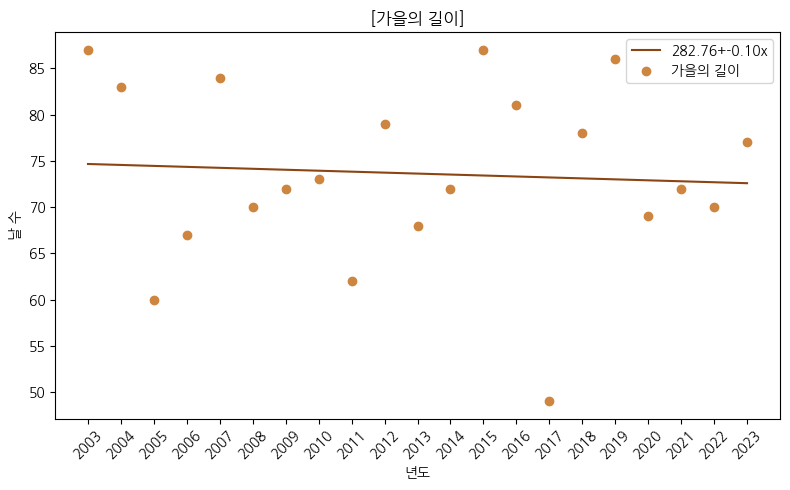

In [1494]:
f_fx = np.poly1d(np.polyfit(df.index,df['fall_season'],1))
xs = np.linspace(df.index.min(), df.index.max())
# xs에 대응하는 y좌표를 구한다
ys = f_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='saddlebrown',label=f"{np.polyfit(df.index,df['fall_season'],1)[1]:.2f}+{np.polyfit(df.index,df['fall_season'],1)[0]:.2f}x")
plt.scatter(df.index, df['fall_season'],label = '가을의 길이', color = 'peru')
plt.title('[가을의 길이]')
plt.ylabel('날 수')
plt.xlabel('년도')
plt.xticks(df.index, rotation= 45)
plt.legend(loc = 'upper right')
plt.tight_layout()

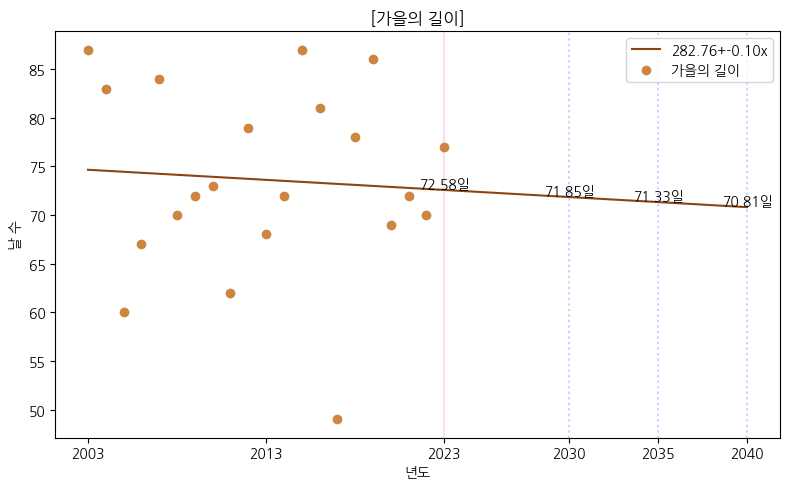

In [1520]:
f_fx = np.poly1d(np.polyfit(df.index,df['fall_season'],1))
xs = np.linspace(df.index.min(), 2040)
# xs에 대응하는 y좌표를 구한다
ys = f_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='saddlebrown',label=f"{np.polyfit(df.index,df['fall_season'],1)[1]:.2f}+{np.polyfit(df.index,df['fall_season'],1)[0]:.2f}x")
x2 = [2023,2030,2035,2040]
for i in range(len(x2)):
    plt.text(x2[i],f_fx(x2)[i],f'{f_fx(x2[i]):.2f}일', ha='center', va='bottom')
plt.scatter(df.index, df['fall_season'],label = '가을의 길이', color = 'peru')
plt.axvline(2023, color = 'palevioletred', alpha = 0.2)
plt.axvline(2030, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2035, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2040, color = 'blue', linestyle = ':',alpha = 0.2)
plt.title('[가을의 길이]')
plt.ylabel('날 수')
plt.xlabel('년도')
xl = np.arange(2003,2041)
plt.xticks([2003,2013,2023,2030,2035,2040])
plt.legend(loc = 'upper right')
plt.tight_layout()

Text(0.5, 0, '년도')

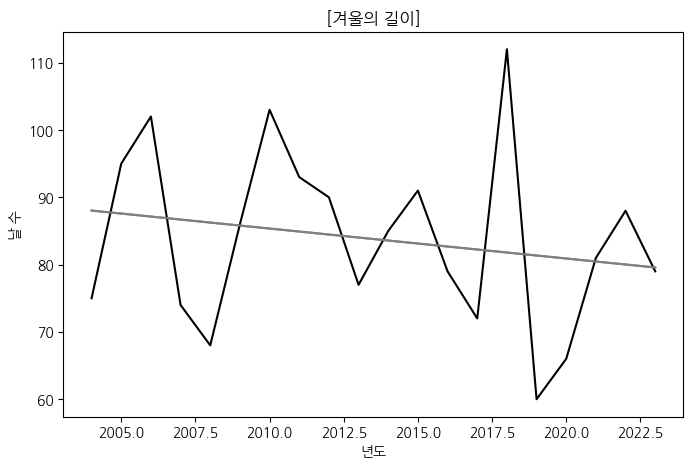

In [1496]:
x = np.array(df.index[1:])
y = np.array(df['winter_season'][1:])
w_fx = np.poly1d(np.polyfit(x,y,1))
xs = np.linspace(x.min(), x.max())
# xs에 대응하는 y좌표를 구한다
ys = w_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='gray')
plt.plot(x,y, color = 'k')
plt.plot(x,w_fx(x),color = 'gray')
plt.title('[겨울의 길이]')
plt.ylabel('날 수')
plt.xlabel('년도')

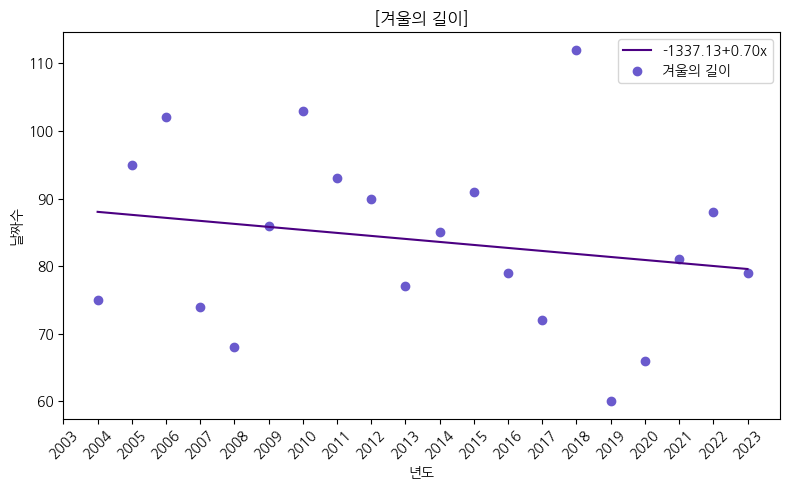

In [1497]:
x = np.array(df.index[1:])
y = np.array(df['winter_season'][1:])
w_fx = np.poly1d(np.polyfit(x,y,1))
xs = np.linspace(x.min(), x.max())
# xs에 대응하는 y좌표를 구한다
ys = w_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='indigo',label=f"{np.polyfit(df.index,df['winter_season'],1)[1]:.2f}+{np.polyfit(df.index,df['winter_season'],1)[0]:.2f}x")
plt.scatter(df.index[1:], df['winter_season'][1:], color = 'slateblue', label = '겨울의 길이')
plt.title('[겨울의 길이]')
plt.ylabel('날짜수')
plt.xlabel('년도')
plt.xticks(df.index, rotation= 45)
plt.legend(loc='upper right')
plt.tight_layout()

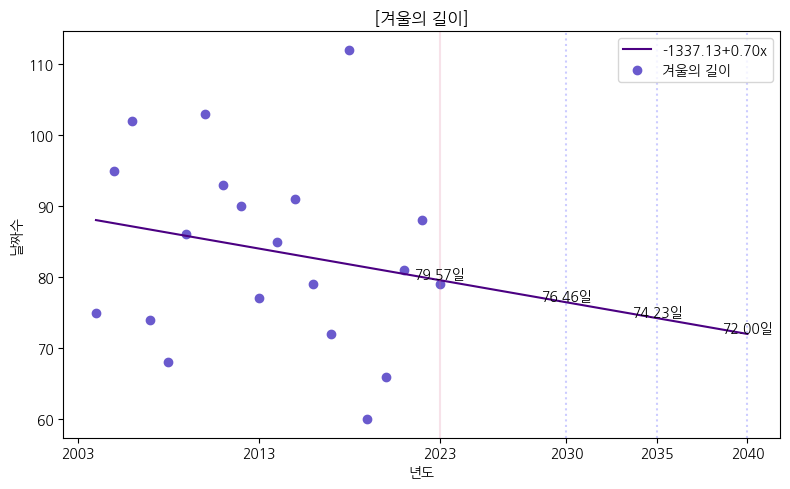

In [1521]:
x = np.array(df.index[1:])
y = np.array(df['winter_season'][1:])
w_fx = np.poly1d(np.polyfit(x,y,1))
xs = np.linspace(x.min(), 2040)
# xs에 대응하는 y좌표를 구한다
ys = w_fx(xs)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='indigo',label=f"{np.polyfit(df.index,df['winter_season'],1)[1]:.2f}+{np.polyfit(df.index,df['winter_season'],1)[0]:.2f}x")
x2 = [2023,2030,2035,2040]
for i in range(len(x2)):
    plt.text(x2[i], w_fx(x2)[i],f'{w_fx(x2[i]):.2f}일', ha='center', va='bottom')
plt.scatter(df.index[1:], df['winter_season'][1:], color = 'slateblue', label = '겨울의 길이')
plt.title('[겨울의 길이]')
plt.ylabel('날짜수')
plt.xlabel('년도')
plt.axvline(2023, color = 'palevioletred', alpha = 0.2)
plt.axvline(2030, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2035, color = 'blue', linestyle = ':',alpha = 0.2)
plt.axvline(2040, color = 'blue', linestyle = ':',alpha = 0.2)
xl = np.arange(2003,2041)
plt.xticks([2003,2013,2023,2030,2035,2040])
plt.legend(loc = 'upper right')
plt.tight_layout()

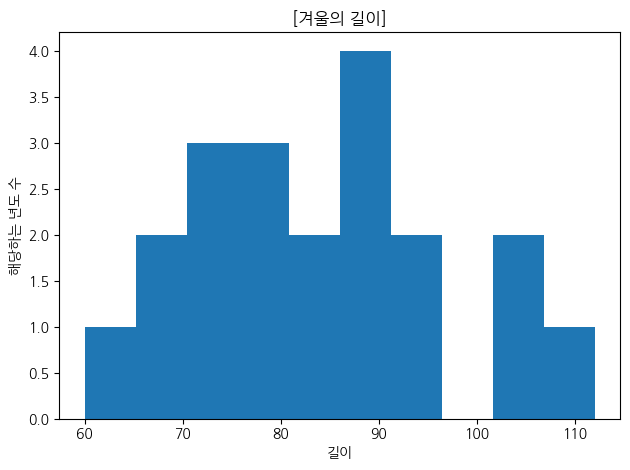

In [1499]:
plt.hist(df['winter_season'][1:] )
plt.title('[겨울의 길이]')
plt.ylabel('해당하는 년도 수')
plt.xlabel('길이')
plt.tight_layout()

Text(0.5, 1.0, '[사계절 길이 변화 예측]')

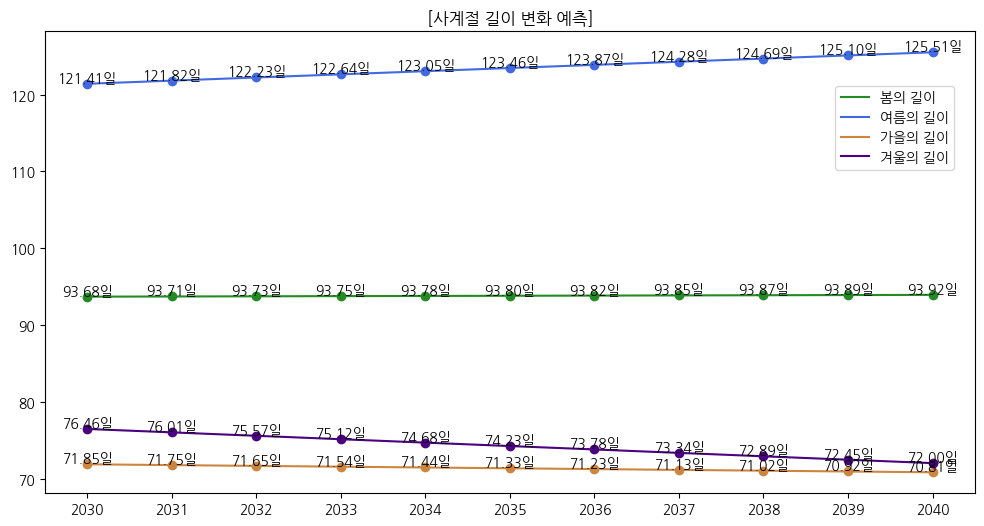

In [1500]:
x = np.linspace(2030,2040,100)
x2 = np.arange(2030,2041)
plt.figure(figsize = (12,6))
plt.plot(x,s_fx(x), label = '봄의 길이', color = 'forestgreen')
plt.plot(x2,s_fx(x2),'o', color = 'forestgreen')
for i in range(len(x2)):
    plt.text(x2[i], s_fx(x2)[i],f'{s_fx(x2[i]):.2f}일', ha='center', va='bottom')
plt.plot(x,su_fx(x), label = '여름의 길이', color = 'royalblue')
plt.plot(x2,su_fx(x2),'o', color = 'royalblue')
for i in range(len(x2)):
    plt.text(x2[i], su_fx(x2)[i],f'{su_fx(x2[i]):.2f}일', ha='center', va='bottom')
plt.plot(x,f_fx(x), label = '가을의 길이', color = 'peru')
plt.plot(x2,f_fx(x2),'o', color = 'peru')
for i in range(len(x2)):
    plt.text(x2[i], f_fx(x2)[i],f'{f_fx(x2[i]):.2f}일', ha='center', va='bottom')
plt.plot(x,w_fx(x), label = '겨울의 길이', color = 'indigo')
plt.plot(x2,w_fx(x2),'o', color = 'indigo')
for i in range(len(x2)):
    plt.text(x2[i], w_fx(x2)[i],f'{w_fx(x2[i]):.2f}일', ha='center', va='bottom')
plt.legend(loc = (0.85,0.7))
plt.xticks(np.arange(2030,2041))
plt.title('[사계절 길이 변화 예측]')